#INF2178 midterm 
Team 43: Yifei Chen, Jingjing Wang

Date: Feburary 28, 2023

Dataset: https://github.com/shionguha/inf2178-expdesignfordatascience-w23/blob/31266c7d0582d23314e855d057e94dc2f7c36c98/project%20dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv 

#1.Preprocessing

###Import dataset 

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Ars.csv to Ars.csv


###Inspect dataset 

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#load the dataset
df = pd.read_csv("Ars.csv")
df.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


In [ ]:
#inspect dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65276 entries, 0 to 65275
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Arrest_Year                      65276 non-null  int64  
 1   Arrest_Month                     65276 non-null  object 
 2   EventID                          65276 non-null  int64  
 3   ArrestID                         64807 non-null  float64
 4   PersonID                         65276 non-null  int64  
 5   Perceived_Race                   65272 non-null  object 
 6   Sex                              65276 non-null  object 
 7   Age_group__at_arrest_            65252 non-null  object 
 8   Youth_at_arrest__under_18_years  65276 non-null  object 
 9   ArrestLocDiv                     65276 non-null  object 
 10  StripSearch                      65276 non-null  int64  
 11  Booked                           65276 non-null  int64  
 12  Occurrence_Categor

,Arrest_Year,EventID,ArrestID,PersonID,StripSearch,Booked,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
count,65276.000000,6.527600e+04,6.480700e+04,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,7801.000000,7801.000000,7801.000000,7801.000000,7801.000000,65276.000000
mean,2020.510096,1.029998e+06,6.032402e+06,318599.919695,0.119508,0.519502,0.004075,0.044136,0.038330,0.033381,0.006358,0.445937,0.765671,0.343161,0.453403,0.418921,0.373157,32638.500000
std,0.499902,1.731809e+04,1.870751e+04,10815.387928,0.324388,0.499623,0.063706,0.205398,0.191992,0.179632,0.079481,0.497072,0.423606,0.474795,0.497856,0.493414,0.483674,18843.702423
min,2020.000000,1.000000e+06,6.000000e+06,300000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2020.000000,1.015001e+06,6.016202e+06,309215.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,16319.750000
50%,2021.000000,1.030006e+06,6.032402e+06,318595.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,32638.500000
75%,2021.000000,1.044996e+06,6.048602e+06,327926.250000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48957.250000
max,2021.000000,1.060002e+06,6.064804e+06,337346.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65276.000000


In [ ]:
#check for missing data
df.isnull().sum()

Arrest_Year                            0
Arrest_Month                           0
EventID                                0
ArrestID                             469
PersonID                               0
Perceived_Race                         4
Sex                                    0
Age_group__at_arrest_                 24
Youth_at_arrest__under_18_years        0
ArrestLocDiv                           0
StripSearch                            0
Booked                                 0
Occurrence_Category                  165
Actions_at_arrest___Concealed_i        0
Actions_at_arrest___Combative__        0
Actions_at_arrest___Resisted__d        0
Actions_at_arrest___Mental_inst        0
Actions_at_arrest___Assaulted_o        0
Actions_at_arrest___Cooperative        0
SearchReason_CauseInjury           57475
SearchReason_AssistEscape          57475
SearchReason_PossessWeapons        57475
SearchReason_PossessEvidence       57475
ItemsFound                         57475
ObjectId        

In [ ]:
#check for NAN
df.isna().sum()

Arrest_Year                            0
Arrest_Month                           0
EventID                                0
ArrestID                             469
PersonID                               0
Perceived_Race                         4
Sex                                    0
Age_group__at_arrest_                 24
Youth_at_arrest__under_18_years        0
ArrestLocDiv                           0
StripSearch                            0
Booked                                 0
Occurrence_Category                  165
Actions_at_arrest___Concealed_i        0
Actions_at_arrest___Combative__        0
Actions_at_arrest___Resisted__d        0
Actions_at_arrest___Mental_inst        0
Actions_at_arrest___Assaulted_o        0
Actions_at_arrest___Cooperative        0
SearchReason_CauseInjury           57475
SearchReason_AssistEscape          57475
SearchReason_PossessWeapons        57475
SearchReason_PossessEvidence       57475
ItemsFound                         57475
ObjectId        

In [ ]:
df.shape

(65276, 25)

In [ ]:
df.describe()

,Arrest_Year,EventID,ArrestID,PersonID,StripSearch,Booked,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
count,65276.000000,6.527600e+04,6.480700e+04,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,7801.000000,7801.000000,7801.000000,7801.000000,7801.000000,65276.000000
mean,2020.510096,1.029998e+06,6.032402e+06,318599.919695,0.119508,0.519502,0.004075,0.044136,0.038330,0.033381,0.006358,0.445937,0.765671,0.343161,0.453403,0.418921,0.373157,32638.500000
std,0.499902,1.731809e+04,1.870751e+04,10815.387928,0.324388,0.499623,0.063706,0.205398,0.191992,0.179632,0.079481,0.497072,0.423606,0.474795,0.497856,0.493414,0.483674,18843.702423
min,2020.000000,1.000000e+06,6.000000e+06,300000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2020.000000,1.015001e+06,6.016202e+06,309215.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,16319.750000
50%,2021.000000,1.030006e+06,6.032402e+06,318595.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,32638.500000
75%,2021.000000,1.044996e+06,6.048602e+06,327926.250000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48957.250000
max,2021.000000,1.060002e+06,6.064804e+06,337346.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65276.000000


In [ ]:
print(df.duplicated().sum())

0


#2. Data Cleaning, EDA, T-test

### Variable: Sex

In [ ]:
df = pd.read_csv('Ars.csv')

#count the values in the 'Sex' column
Sex_co = df['Sex'].value_counts()

#calculate percentage for each age group
sex_per = Sex_co / len(df) * 100

#print value counts and percentages for each age group
for sex_group in Sex_co.index:
    count = Sex_co[sex_group]
    percent = sex_per[sex_group]
    print(f'{sex_group}: {count} ({percent:.2f}%)')


M: 52650 (80.66%)
F: 12617 (19.33%)
U: 9 (0.01%)


We will handle missing value for Age_group__at_arrest_, Occurrence_Category as they are relevant to our research questions. 

In [ ]:
#drop any row that contain "U" for Sex, assuming that U stands for unknown, thus is missing value 
df.drop(df[df['Sex'] == 'U'].index, inplace=True)
Sex_c = df['Sex'].value_counts()
Sex_c

M    52650
F    12617
Name: Sex, dtype: int64

### Variable: Age

In [ ]:
#count the values in the 'Age_group__at_arrest_' column
age_counts = df['Age_group__at_arrest_'].value_counts()
age_counts

Aged 25 to 34 years          20945
Aged 35 to 44 years          16241
Aged 18 to 24 years          10039
Aged 45 to 54 years           9066
Aged 55 to 64 years           4588
Aged 17 years and younger     1681
Aged 17 years and under       1361
Aged 65 years and older        698
Aged 65 and older              624
Name: Age_group__at_arrest_, dtype: int64

In [ ]:
#combine the repetitive values in "age group":replace aged 17 years and under with Aged 17 years and younger; replace Aged 65 and older with Aged 65 years and older  
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace({'Aged 17 years and under': 'Aged 17 years and younger', 'Aged 65 and older': 'Aged 65 years and older'})
age_counts = df['Age_group__at_arrest_'].value_counts()

#calculate percentage for each age group
age_percents = age_counts / len(df) * 100

#print value counts and percentages for each age group
for age_group in age_counts.index:
    count = age_counts[age_group]
    percent = age_percents[age_group]
    print(f'{age_group}: {count} ({percent:.2f}%)')

Aged 25 to 34 years: 20945 (32.09%)
Aged 35 to 44 years: 16241 (24.88%)
Aged 18 to 24 years: 10039 (15.38%)
Aged 45 to 54 years: 9066 (13.89%)
Aged 55 to 64 years: 4588 (7.03%)
Aged 17 years and younger: 3042 (4.66%)
Aged 65 years and older: 1322 (2.03%)


In [ ]:
#drop missing value in Age_group__at_arrest_ 
df= df.dropna(subset=['Age_group__at_arrest_'])
age_counts = df['Age_group__at_arrest_'].value_counts()
age_counts


Aged 25 to 34 years          20945
Aged 35 to 44 years          16241
Aged 18 to 24 years          10039
Aged 45 to 54 years           9066
Aged 55 to 64 years           4588
Aged 17 years and younger     3042
Aged 65 years and older       1322
Name: Age_group__at_arrest_, dtype: int64

### Variable: Occurrence

In [ ]:
#drop rows with missing values only for the Occurrence_Category column
df = df.dropna(subset=['Occurrence_Category'])
occurrence_counts = df['Occurrence_Category'].value_counts()

#calculate percentage for each age group
occurrence_p = occurrence_counts / len(df) * 100

#create table
table_0 = pd.DataFrame({'Count': occurrence_counts, 'Percentage': occurrence_p})
table_0.index.name = 'Occurrence Category'

print(table_0)


                                                 Count  Percentage
Occurrence Category                                               
Assault                                           7724   11.868834
Assault & Other crimes against persons            7234   11.115892
Robbery & Theft                                   4579    7.036172
Warrant                                           4377    6.725775
FTA/FTC/Compliance Check/Parollee                 4244    6.521405
Police Category - Administrative                  3885    5.969759
FTA/FTC, Compliance Check & Parollee              3876    5.955930
Robbery/Theft                                     3752    5.765389
Drug Related                                      2751    4.227235
Other Statute & Other Incident Type               2338    3.592612
Vehicle Related (inc. Impaired)                   1977    3.037893
Other Offence                                     1972    3.030210
Mischief & Fraud                                  1732    2.66

Prepare the dataset for research question: Does the occurrence category of the arrest significantly impact the likelihood of strip searches?

In [ ]:
#filter the data
df_occurrence = df[["Sex", "Occurrence_Category", "StripSearch"]]

#convert categorical variables into numerical data - binary (0 or 1) 
df_occurrence = pd.get_dummies(df_occurrence, columns=["Occurrence_Category"])
df_occurrence

,Sex,StripSearch,Occurrence_Category_Assault,Occurrence_Category_Assault & Other crimes against persons,Occurrence_Category_Break & Enter,Occurrence_Category_Break and Enter,Occurrence_Category_Crimes against Children,Occurrence_Category_Drug Related,"Occurrence_Category_FTA/FTC, Compliance Check & Parollee",Occurrence_Category_FTA/FTC/Compliance Check/Parollee,...,Occurrence_Category_Police Category - Incident,Occurrence_Category_Robbery & Theft,Occurrence_Category_Robbery/Theft,Occurrence_Category_Sexual Related Crime,Occurrence_Category_Sexual Related Crimes & Crimes Against Children,Occurrence_Category_Vehicle Related,Occurrence_Category_Vehicle Related (inc. Impaired),Occurrence_Category_Warrant,Occurrence_Category_Weapons,Occurrence_Category_Weapons & Homicide
0,M,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65271,F,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
65272,M,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65273,F,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65274,M,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


###Assign unique identifier for "Age at arrest", making the values numeric 

The age group values are not consistent
e.g. "Aged 17 years and younger" and "Aged 17 years and under" refer to the same group of people. We need to combine these values.  

In [ ]:
import pandas as pd
#create a new dataset with just the columns needed
# Select the columns of interest
df_cleaned = df[['Age_group__at_arrest_', 'Sex','Perceived_Race', 'Actions_at_arrest___Concealed_i', 
         'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d', 
         'Actions_at_arrest___Mental_inst', 'Actions_at_arrest___Assaulted_o', 
         'Actions_at_arrest___Cooperative', 'Occurrence_Category', 'StripSearch']]

df_cleaned

,Age_group__at_arrest_,Sex,Perceived_Race,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,Occurrence_Category,StripSearch
0,Aged 35 to 44 years,M,White,0,0,0,0,0,1,Assault & Other crimes against persons,0
1,Aged 35 to 44 years,M,White,0,0,0,0,0,0,Assault & Other crimes against persons,0
2,Aged 35 to 44 years,M,Unknown or Legacy,0,0,0,0,0,0,Assault & Other crimes against persons,0
3,Aged 25 to 34 years,M,Black,0,0,0,0,0,0,Harassment/Threatening,0
4,Aged 25 to 34 years,M,South Asian,0,0,0,0,0,0,FTA/FTC/Compliance Check/Parollee,0
...,...,...,...,...,...,...,...,...,...,...,...
65271,Aged 25 to 34 years,F,Indigenous,0,0,1,0,0,0,Vehicle Related,0
65272,Aged 35 to 44 years,M,South Asian,0,0,0,0,0,0,Assault,0
65273,Aged 45 to 54 years,F,White,0,0,0,0,0,0,Assault,0
65274,Aged 17 years and younger,M,Unknown or Legacy,0,0,0,0,0,1,Robbery/Theft,0


In [ ]:
#assign unique identifier to age groups
age_number = {'Aged 25 to 34 years': 3, 
              'Aged 35 to 44 years': 4,
              'Aged 18 to 24 years': 2,
              'Aged 45 to 54 years': 5,
              'Aged 55 to 64 years': 6,
              'Aged 17 years and younger': 1,
              'Aged 65 years and older': 7}

df_cleaned['age_group_id'] = df_cleaned['Age_group__at_arrest_'].apply(lambda x: age_number[x])

# Drop the original age group column
#df_cleaned.drop(columns=['Age_group__at_arrest_'], inplace=True)

# Save the new dataset
df_cleaned.to_csv('cleaned_Ars.csv', index=False)

df_cleaned

<ipython-input-188-6c9fb41cdaf0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['age_group_id'] = df_cleaned['Age_group__at_arrest_'].apply(lambda x: age_number[x])


,Age_group__at_arrest_,Sex,Perceived_Race,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,Occurrence_Category,StripSearch,age_group_id
0,Aged 35 to 44 years,M,White,0,0,0,0,0,1,Assault & Other crimes against persons,0,4
1,Aged 35 to 44 years,M,White,0,0,0,0,0,0,Assault & Other crimes against persons,0,4
2,Aged 35 to 44 years,M,Unknown or Legacy,0,0,0,0,0,0,Assault & Other crimes against persons,0,4
3,Aged 25 to 34 years,M,Black,0,0,0,0,0,0,Harassment/Threatening,0,3
4,Aged 25 to 34 years,M,South Asian,0,0,0,0,0,0,FTA/FTC/Compliance Check/Parollee,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
65271,Aged 25 to 34 years,F,Indigenous,0,0,1,0,0,0,Vehicle Related,0,3
65272,Aged 35 to 44 years,M,South Asian,0,0,0,0,0,0,Assault,0,4
65273,Aged 45 to 54 years,F,White,0,0,0,0,0,0,Assault,0,5
65274,Aged 17 years and younger,M,Unknown or Legacy,0,0,0,0,0,1,Robbery/Theft,0,1


### Bar plots: selected variables  

<Figure size 432x288 with 0 Axes>

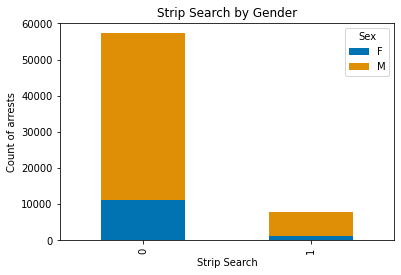

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#create bar plot strip search vs sex
sns.set_palette("colorblind")
plt.figure()
df.groupby(['StripSearch', 'Sex'])['StripSearch'].count().unstack().plot(kind='bar', stacked=True)

plt.xlabel('Strip Search')
plt.ylabel('Count of arrests')
plt.title('Strip Search by Gender')
plt.show()

<Figure size 432x288 with 0 Axes>

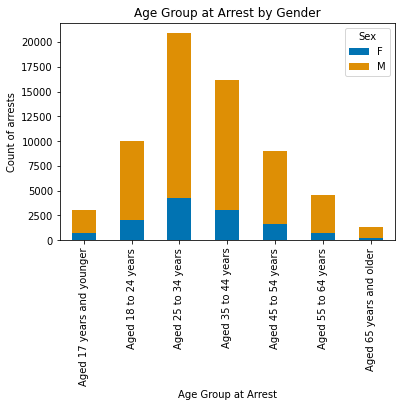

In [ ]:
#create bar plot age group and sex 
plt.figure()
df.groupby(['Age_group__at_arrest_', 'Sex'])['Age_group__at_arrest_'].count().unstack().plot(kind='bar', stacked=True)

plt.xlabel('Age Group at Arrest')
plt.ylabel('Count of arrests')
plt.title('Age Group at Arrest by Gender')
plt.show()

### Percentage: Different types of actions at arrest

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#load the dataset
df = pd.read_csv('Ars.csv')

#define the columns
col_percentage = ["Actions_at_arrest___Concealed_i", "Actions_at_arrest___Combative__",
                      "Actions_at_arrest___Resisted__d", "Actions_at_arrest___Mental_inst",
                      "Actions_at_arrest___Assaulted_o", "Actions_at_arrest___Cooperative"]

#store the results
results = {}

#loop through each column, calculate the percentage
for col in col_percentage:
    value_counts = df[col].value_counts()
    results[col] = dict(value_counts / len(df) * 100)

#print the percentages for each column
for col, percentages in results.items():
    print(f"Percentages for column {col}:")
    for value, percentage in percentages.items():
        print(f"{value}: {percentage:.2f}%")


Percentages for column Actions_at_arrest___Concealed_i:
0: 99.59%
1: 0.41%
Percentages for column Actions_at_arrest___Combative__:
0: 95.59%
1: 4.41%
Percentages for column Actions_at_arrest___Resisted__d:
0: 96.17%
1: 3.83%
Percentages for column Actions_at_arrest___Mental_inst:
0: 96.66%
1: 3.34%
Percentages for column Actions_at_arrest___Assaulted_o:
0: 99.36%
1: 0.64%
Percentages for column Actions_at_arrest___Cooperative:
0: 55.41%
1: 44.59%


###T-test

####Age as a factor for actions at arrest
Are there significant differences in the actions at arrest across different age groups?

In [ ]:
# Divide age groups to two (24 and younger, 25 and older)
# H0: there is no significant difference in the means of actions at arrest across different two age group
# H1: there is a significant difference.

from scipy.stats import ttest_ind
df_cleaned = pd.read_csv('cleaned_Ars.csv')

#divide age groups into two categories
df_cleaned['age_group_category'] = df_cleaned['age_group_id'].apply(lambda x: '17-24' if x in [3, 6] else '25+')

#select the columns of interest
cols = ['Actions_at_arrest___Concealed_i', 'Actions_at_arrest___Combative__', 
        'Actions_at_arrest___Resisted__d', 'Actions_at_arrest___Mental_inst', 
        'Actions_at_arrest___Assaulted_o', 'Actions_at_arrest___Cooperative']
data = df_cleaned[cols]

#perform t-test for each action at arrest
for col in cols:
    group1 = data[df_cleaned['age_group_category'] == '17-24'][col]
    group2 = data[df_cleaned['age_group_category'] == '25+'][col]
    t, p = ttest_ind(group1, group2)
    print('Action at arrest:', col)
    print('t-statistic:', t)
    print('p-value:', p)

    #determine the significance
    alpha = 0.05
    if p < alpha:
        print('Reject null hypothesis')
    else:
        print('Fail to reject null hypothesis')
    print('------------------------')



Action at arrest: Actions_at_arrest___Concealed_i
t-statistic: -0.4715703512417236
p-value: 0.6372350744522564
Fail to reject null hypothesis
------------------------
Action at arrest: Actions_at_arrest___Combative__
t-statistic: 3.086077858635408
p-value: 0.002029008228900766
Reject null hypothesis
------------------------
Action at arrest: Actions_at_arrest___Resisted__d
t-statistic: 1.835621796931247
p-value: 0.06641817150020024
Fail to reject null hypothesis
------------------------
Action at arrest: Actions_at_arrest___Mental_inst
t-statistic: 3.1910179745594967
p-value: 0.0014183973704675146
Reject null hypothesis
------------------------
Action at arrest: Actions_at_arrest___Assaulted_o
t-statistic: 1.6509397318539079
p-value: 0.09875570717128028
Fail to reject null hypothesis
------------------------
Action at arrest: Actions_at_arrest___Cooperative
t-statistic: -2.725519151746694
p-value: 0.00642176155889634
Reject null hypothesis
------------------------


In [ ]:
#get counts and percentages for individuals under 24 and over 25. 
counts = df_cleaned['age_group_category'].value_counts()
percentages = counts / len(df) * 100
#calculate percentage for each age group

#create table
table = pd.DataFrame({'Count': counts, 'Percentage': percentages})
table.index.name = 'Age Category'

print(table)

              Count  Percentage
Age Category                   
25+           39602   60.668546
17-24         25476   39.028127


####Sex as a factor for actions at arrest

In [ ]:
import pandas as pd
import scipy.stats as stats

#perform t test between sex and each actions at arrest
table = pd.crosstab(df_cleaned['Actions_at_arrest___Mental_inst'], df_cleaned['Sex'])

#define the action columns
action_cols = ['Actions_at_arrest___Concealed_i', 'Actions_at_arrest___Combative__',
               'Actions_at_arrest___Resisted__d', 'Actions_at_arrest___Mental_inst',
               'Actions_at_arrest___Assaulted_o', 'Actions_at_arrest___Cooperative']

#loop through each action column
for col in action_cols:
    # Create a contingency table of the action column and sex
    table = pd.crosstab(df_cleaned[col], df_cleaned['Sex'])

    # t-test
    t_stat, p_value = stats.ttest_ind(table.iloc[:,0], table.iloc[:,1])

    #results
    print('Action:', col)
    print('T-statistic: {:.2f}'.format(t_stat))
    print('P-value: {:.4f}'.format(p_value))

    #significance
    alpha = 0.05
    if p_value < alpha:
        print('Reject null hypothesis')
    else:
        print('Fail to reject null hypothesis')
    print('------------------------')

Action: Actions_at_arrest___Concealed_i
T-statistic: -0.75
P-value: 0.5333
Fail to reject null hypothesis
------------------------
Action: Actions_at_arrest___Combative__
T-statistic: -0.81
P-value: 0.5026
Fail to reject null hypothesis
------------------------
Action: Actions_at_arrest___Resisted__d
T-statistic: -0.80
P-value: 0.5067
Fail to reject null hypothesis
------------------------
Action: Actions_at_arrest___Mental_inst
T-statistic: -0.79
P-value: 0.5121
Fail to reject null hypothesis
------------------------
Action: Actions_at_arrest___Assaulted_o
T-statistic: -0.75
P-value: 0.5322
Fail to reject null hypothesis
------------------------
Action: Actions_at_arrest___Cooperative
T-statistic: -7.20
P-value: 0.0187
Reject null hypothesis
------------------------


####Sex as a factor for strip search 

In [ ]:
# Does sex significantly impact the likelihood of strip searches?
# •	H0: There is no difference in the likelihood of strip searches between males and females.
# •	H1: There is a significant difference in the likelihood of strip searches between males and females.
# T test
import pandas as pd
import scipy.stats as stats

#load the cleaned dataset
df_cleaned = pd.read_csv('cleaned_Ars.csv')

#create a contingency table of strip searches by sex
table = pd.crosstab(df_cleaned['StripSearch'], df_cleaned['Sex'])

# Perform the t-test
t_stat, p_value = stats.ttest_ind(table.iloc[:,0], table.iloc[:,1])

# Print the results
print('T-statistic: {:.2f}'.format(t_stat))
print('P-value: {:.2f}'.format(p_value))

# Determine the significance
alpha = 0.05
if p_value < alpha:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

T-statistic: -0.98
P-value: 0.43
Fail to reject null hypothesis


####Occurrence as a factor for strip search
Explore our hypothesis: The occurrence category of the arrest will significantly impact the likelihood of a strip search, drug-related and weapon-relating occurrences are associated with a higher likelihood of a strip search.

In [ ]:
# Does drug-related or weapon-relating occurrences significantly impact the likelihood of strip searches?
# Combine "Weapons & Homicide','Weapons','Drug Related' as one group called drug-related or weapon-related and the rest to group "others" to perform t test
# •	H0: There is no difference in the likelihood of strip searches between drug-related or weapon-related crime and Others. 
# •	H1: There is a significant difference in the likelihood of strip searches between drug-related or weapon-related crime and others. 


# Create a new column that assign weapon and drug or other categories 
df_cleaned['Group'] = df_cleaned['Occurrence_Category'].apply(lambda x: 'Weapons or Drug Related' if x in ['Weapons & Homicide','Weapons','Drug Related'] else 'Others')

# Subset the dataframe to only include the necessary columns
subset_df = df_cleaned[['StripSearch', 'Group']]


# Calculate the mean strip search rate for each group
weapon_drug_mean = subset_df.loc[subset_df['Group'] == 'Weapons or Drug Related', 'StripSearch'].mean()
others_mean = subset_df.loc[subset_df['Group'] == 'Others', 'StripSearch'].mean()

# Perform t-test
t_stat, p_value = stats.ttest_ind(subset_df.loc[subset_df['Group'] == 'Weapons or Drug Related', 'StripSearch'], subset_df.loc[subset_df['Group'] == 'Others', 'StripSearch'], equal_var=False)

#print results
print('Weapons or Drug Related vs. Others: t-statistic = {:.2f}, p-value = {:.4f}'.format(t_stat, p_value))

# Determine the significance
alpha = 0.05
if p_value < alpha:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')


Weapons or Drug Related vs. Others: t-statistic = 32.54, p-value = 0.0000
Reject null hypothesis


In [ ]:
#create a table that shows the portion of the weapon/drug related occurrence in the dataset.
occurrence_counts2 = df_cleaned['Group'].value_counts()

#calculate percentage for each age group
occurrence_p2 = occurrence_counts2 / len(df) * 100

#create table
table_o2 = pd.DataFrame({'Count': occurrence_counts2, 'Percentage': occurrence_p2})
table_o2.index.name = 'Occurrence Category'

print(table_o2)


                         Count  Percentage
Occurrence Category                       
Others                   60116   92.095104
Weapons or Drug Related   4962    7.601569


# 3.Methods

###One-Way ANOVA: Age group and actions at arrest




H0: there is no significant difference in the means of actions at arrest across different age group
H1: there is a significant difference.

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
import statsmodels.api as sm
df_cleaned['action'] = df_cleaned['Actions_at_arrest___Concealed_i'] + df_cleaned['Actions_at_arrest___Combative__'] + df_cleaned['Actions_at_arrest___Resisted__d'] + df_cleaned['Actions_at_arrest___Mental_inst'] + df_cleaned['Actions_at_arrest___Assaulted_o'] + df_cleaned['Actions_at_arrest___Cooperative']

# create the ANOVA model
model = ols('action ~ C(age_group_id)', data=df_cleaned).fit()
# print(model)
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Get the p-value from the ANOVA results
p_value = anova_table['PR(>F)'][0]

                       sum_sq       df        F    PR(>F)
C(age_group_id)      7.076491      6.0  3.44657  0.002097
Residual         22267.273505  65071.0      NaN       NaN


In [ ]:
# Perform post-hoc tests using Tukey's HSD test
mc = MultiComparison(df_cleaned[['action']], df_cleaned['age_group_id'])
tukey_result = mc.tukeyhsd()
print('\nPost-hoc tests (Tukey HSD)')
print(tukey_result)

# Determine the significance
alpha = 0.05
if p_value < alpha:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')


Post-hoc tests (Tukey HSD)
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.0305 0.1537 -0.0053 0.0663  False
     1      3   0.0425 0.0035   0.009  0.076   True
     1      4    0.044 0.0027  0.0099 0.0781   True
     1      5   0.0432  0.008   0.007 0.0794   True
     1      6   0.0241 0.5655 -0.0163 0.0645  False
     1      7   0.0358 0.5104 -0.0212 0.0927  False
     2      3    0.012 0.6065  -0.009  0.033  False
     2      4   0.0135 0.5316 -0.0084 0.0354  False
     2      5   0.0127 0.7226 -0.0124 0.0377  False
     2      6  -0.0064    0.9 -0.0372 0.0244  False
     2      7   0.0053    0.9 -0.0453 0.0558  False
     3      4   0.0015    0.9 -0.0166 0.0196  False
     3      5   0.0006    0.9 -0.0211 0.0224  False
     3      6  -0.0184 0.4626 -0.0466 0.0097  False
     3      7  -0.0068    0.9 -0.0558 0.0423  False
     4      5  -0.0009    0.9 -0.023

###One way ANOVA: occurrence & strip search

Does the occurrence category significantly impact the likelihood of strip searches? 
H0: there is no significnat difference in the means of strip searches across different occurrence categories. 
H1: there is a significant difference

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

# create the ANOVA model
model = ols('StripSearch ~ C(Occurrence_Category)', data=df_cleaned).fit()

# print the ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# calculate the p-value
p_value = anova_table['PR(>F)'][0]

# Determine the significance
alpha = 0.05
if p_value < alpha:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

                             sum_sq       df          F  PR(>F)
C(Occurrence_Category)  1025.909609     30.0  380.94375     0.0
Residual                5839.212245  65047.0        NaN     NaN
Reject null hypothesis


In [ ]:
df_cleaned['Group'] = df_cleaned['Occurrence_Category'].apply(lambda x: 'Weapons or Drug Related' if x in ['Weapons & Homicide','Weapons','Drug Related'] else 'Others')

# create the ANOVA model
model = ols('StripSearch ~ C(Group)', data=subset_df).fit()
# print(model)
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Get the p-value from the ANOVA results
p_value = anova_table['PR(>F)'][0]

# Determine the significance
alpha = 0.05
if p_value < alpha:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')


               sum_sq       df            F  PR(>F)
C(Group)   221.351427      1.0  2168.146181     0.0
Residual  6643.770427  65076.0          NaN     NaN
Reject null hypothesis


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

# Create a MultiComparison object
mc = MultiComparison(df_cleaned['StripSearch'], df_cleaned['Occurrence_Category'])

# Perform Tukey's HSD test
tukey_result = mc.tukeyhsd(alpha=0.05)

# Print the summary table

print(tukey_result.summary())

                                         Multiple Comparison of Means - Tukey HSD, FWER=0.05                                          
                     group1                                          group2                     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------------------------------------------------------------
                                        Assault          Assault & Other crimes against persons   0.1838  0.001  0.1653  0.2023   True
                                        Assault                                   Break & Enter   0.4499  0.001  0.4105  0.4894   True
                                        Assault                                 Break and Enter   0.0269 0.7515 -0.0135  0.0672  False
                                        Assault                         Crimes against Children  -0.0135    0.9 -0.1499  0.1229  False
                                        Assault        

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

# Create a MultiComparison object
mc = MultiComparison(df_cleaned['StripSearch'], df_cleaned['Group'])

# Perform Tukey's HSD test
tukey_result = mc.tukeyhsd(alpha=0.05)

# Print the summary table

print(tukey_result.summary())

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1          group2         meandiff p-adj lower  upper reject
-----------------------------------------------------------------
Others Weapons or Drug Related   0.2198 0.001 0.2105 0.229   True
-----------------------------------------------------------------


###Plots

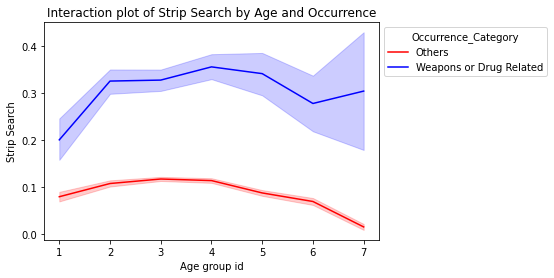

<Figure size 3168x31680 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new column that assign weapon and drug or other categories 
df_cleaned['Group'] = df_cleaned['Occurrence_Category'].apply(lambda x: 'Weapons or Drug Related' if x in ['Weapons & Homicide','Weapons','Drug Related'] else 'Others')

# Subset the dataframe to only include the necessary columns
subset_df = df_cleaned[['StripSearch', 'Group', 'age_group_id']]

# create boxplots
g = sns.lineplot(x='age_group_id', y='StripSearch', hue='Group', data=subset_df, estimator='mean')

plt.xlabel('Age group id')
plt.ylabel('Strip Search')
plt.title('Interaction plot of Strip Search by Age and Occurrence')
plt.figure(figsize=[44,440])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1), title='Occurrence_Category')
plt.show()

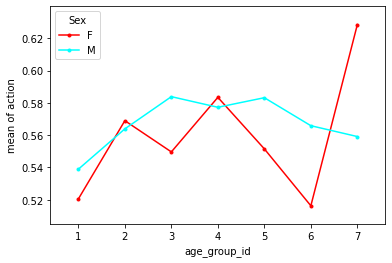

In [ ]:
from statsmodels.graphics.factorplots import interaction_plot


interaction_plot(x=df_cleaned['age_group_id'], trace=df_cleaned['Sex'], response=df_cleaned['action'])
plt.show()

Text(0, 0.5, 'Mean frequency of actions at arrest')

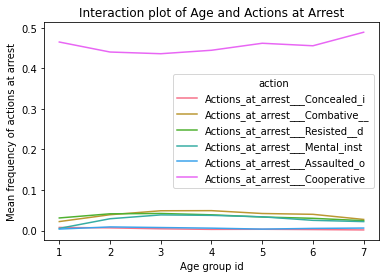

In [ ]:
import seaborn as sns

# Reshape the mean dataframe to long format

#load the cleaned dataset
df_cleaned = pd.read_csv('cleaned_Ars.csv')

mean_df = df_cleaned.groupby('age_group_id')[['Actions_at_arrest___Concealed_i', 'Actions_at_arrest___Combative__', 
                                        'Actions_at_arrest___Resisted__d', 'Actions_at_arrest___Mental_inst', 
                                        'Actions_at_arrest___Assaulted_o', 'Actions_at_arrest___Cooperative']].mean()

mean_df_melt = mean_df.reset_index().melt(id_vars='age_group_id', var_name='action')

# Create the interaction plot
sns.lineplot(x='age_group_id', y='value', hue='action', data=mean_df_melt)

plt.title('Interaction plot of Age and Actions at Arrest')
plt.xlabel('Age group id')
plt.ylabel('Mean frequency of actions at arrest')


plt.title('Interaction plot of Age and Actions at Arrest')
plt.xlabel('Age group id')
plt.ylabel('Mean frequency of actions at arrest')